In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
from pathlib import Path

### 1つの駅でも、複数緯度経度があるため、それらは別のデータとして`yamano`の中に入っている。最後の`df_dists`の中の`station`では同じものとして扱っている

In [118]:
len(sta_list)

298

In [286]:
sta = pd.read_csv("station.csv")
#sta.sample(20)
sta_list = ["大崎","五反田","目黒","恵比寿","渋谷","原宿","代々木",
            "新宿","新大久保","高田馬場", "目白","池袋","大塚",
            "巣鴨","駒込","田端","西日暮里","日暮里","鶯谷","上野", 
            "御徒町","秋葉原","神田","東京","有楽町","新橋","浜松町","田町","品川"]

sta_list = [#山手線
            "大崎","五反田","目黒","恵比寿","渋谷","原宿","代々木",
            "新宿","新大久保","高田馬場", "目白","池袋","大塚",
            "巣鴨","駒込","田端","西日暮里","日暮里","鶯谷","上野", 
            "御徒町","秋葉原","神田","東京","有楽町","新橋","浜松町","田町","品川",
            #総武線
            "三鷹", "吉祥寺","西荻窪","荻窪","阿佐ヶ谷", "高円寺","中野","東中野", 
            "大久保", "新宿", "代々木", "千駄ヶ谷", "信濃町", "四ッ谷", "市ヶ谷",
            "飯田橋", "水道橋", "御茶ノ水", "秋葉原", "浅草橋", "両国", "錦糸町", 
            "亀戸", "平井", "新小岩", "小岩",
           #中央線
            "神田", "武蔵境","東小金井","武蔵小金井", "国分寺", "西国分寺", "国立", 
            "立川", "日野", "豊田", "八王子", "西八王子","高尾", 
            #埼京線
            "大崎", "恵比寿", "板橋", "十条", "赤羽", "北赤羽", "浮間舟渡",
            #常磐線
            "三河島", "南千住", "北千住", "綾瀬", "亀有", "金町", 
            #京葉線
            "八丁堀", "越中島", "潮見", "新木場", "葛西臨海公園",
            #南武線
            "矢野口", "稲城長沼", "南多摩", "府中本町", "分倍河原", "西府", "谷保", "矢川", "西国立", "立川", 
            #青梅線
            "西立川", "東中神", "中神", "昭島", "拝島", "牛浜", "福生", "羽村", "小作", 
            "河辺", "東青梅", "青梅", "宮ノ平", "日向和田", "石神前", "二俣尾", "軍畑", 
            "沢井", "御嶽", "川井", "古里", "鳩ノ巣", "白丸", "奥多摩", 
            #小田急線
            "南新宿", "参宮橋", "代々木八幡", "代々木上原", "東北沢", "下北沢", 
            "世田谷代田", "梅ヶ丘", "豪徳寺", "経堂", "千歳船橋", "祖師ヶ谷大蔵", 
            "成城学園前", "喜多見", "狛江", 
            #京王線
            "笹塚", "代田橋", "明大前", "下高井戸", "桜上水", "上北沢", "八幡山", "芦花公園", 
            "千歳烏山", "仙川", "つつじヶ丘", "柴崎", "国領", "布田", "調布", "西調布", 
            "飛田給", "武蔵野台", "多磨霊園", "東府中", "府中", "分倍河原", "中河原", 
            "聖蹟桜ヶ丘", "百草園", "高幡不動", "南平", "平山城址公園", "長沼", "北野", "京王八王子", 
            #京王井の頭線
            "神泉", "駒場東大前", "池ノ上", "新代田", "東松原", "永福町", "西永福", 
            "浜田山", "高井戸", "富士見ヶ丘", "久我山", "三鷹台","井の頭公園", "吉祥寺", 
            #東急東横線
            "代官山", "中目黒", "祐天寺", "学芸大学", "都立大学", "自由が丘", "田園調布", "多摩川", "新丸子"]

#東急大井町線
a = "大井町 下神明 戸越公園 中延　荏原町 旗の台 北千束 大岡山 緑が丘 九品仏 尾山台 等々力 上野毛"
#東急池上線
b = "五反田 大崎広小路 戸越銀座 荏原中延 旗の台 長原 洗足池 石川台 雪が谷大塚 御嶽山 久が原 千鳥町 池上 蓮沼 蒲田"
#銀座線
c = "表参道 外苑前 青山一丁目 赤坂見附 溜池山王 虎ノ門 銀座 京橋 日本橋 三越前 神田 末広町 上野広小路 上野 稲荷町 田原町 浅草"
#日比谷線
d = "北千住 南千住 三ノ輪 入谷 上野 仲御徒町 小伝馬町 人形町 茅場町 八丁堀 築地 \
東銀座 日比谷 霞ヶ関 神谷町 六本木 広尾 恵比寿 中目黒"
#半蔵門線
e = "押上 錦糸町 住吉 清澄白河 水天宮前 三越前 大手町 神保町 九段下 半蔵門 永田町 青山一丁目"
#東武スカイツリーライン
f = "とうきょうスカイツリー 曳舟 東向島 鐘ヶ淵 堀切 牛田 北千住 小菅 五反野 梅島 \
西新井 竹ノ塚 谷塚 草加 獨協大学前 新田 蒲生 新越谷 越谷 北越谷 大袋 せんげん台 \
武里 一ノ割 春日部 北春日部 姫宮 東武動物公園"
#都営大江戸線
g = "都庁前 新宿西口 東新宿 若松河田 牛込柳町 牛込神楽坂 春日 本郷三丁目 上野御徒町 新御徒町 蔵前 \
森下 清澄白河 門前仲町 月島 勝どき 築地市場 汐留 大門 赤羽橋 麻布十番 六本木 国立競技場 \
都庁前 西新宿五丁目 中野坂上 中井 落合南長崎 新江古田 練馬 豊島園 光が丘"
#ゆりかもめ
h = "汐留 竹芝 日の出 芝浦ふ頭 お台場海浜公園 台場 東京国際クルーズターミナル \
テレコムセンター 青海 東京ビッグサイト 有明 有明テニスの森 市場前 新豊洲 豊洲"
#都営三田線
i = "白金台 白金高輪 三田 芝公園 御成門 内幸町 日比谷 大手町 神保町 白山 千石 \
西巣鴨 新板橋 板橋区役所前 板橋本町 本蓮沼 志村坂上 志村三丁目 蓮根 西台 高島平 新高島平 西高島平"
#東武東上線
j = "北池袋 下板橋 大山 中板橋 ときわ台 上板橋 東武練馬 下赤塚 成増"
#都営新宿線
k = "新線新宿 新宿三丁目 曙橋 九段下 小川町 岩本町 馬喰横山 浜町 菊川 \
住吉 西大島 大島 東大島 船堀 一之江 瑞江 篠崎 本八幡"
#京急本線
m = "泉岳寺 北品川 新馬場 青物横丁 鮫洲 立会川 大森海岸 平和島 大森町 梅屋敷 京急蒲田 雑色 六郷土手"
#東京モノレール
n = "天王洲アイル 大井競馬場前 流通センター 昭和島 整備場 天空橋 羽田空港国際線ビル 新整備場 羽田空港第１ビル 羽田空港第２ビル"
a = a+b+c+d+e+f+g+h+i+j+k+m+n
a = a.split()
sta_list.extend(a)
sta_list = list(set(sta_list))
#print(len(sta_list))
yamano = sta[sta['station_name'].isin(sta_list)].iloc[:,[0,1,2, 9,10]]
yamano = yamano[~yamano["lon"].duplicated(keep='first')]
yamano = yamano.sort_values(by=["station_name"])
yamano = yamano[(yamano["lon"]>138)&(yamano["lon"]<140)&(yamano["lat"]>35.5)&(yamano["lat"]<35.8)]
yamano.head()

,station_cd,station_g_cd,station_name,lon,lat
7810,9931106,9931106,お台場海浜公園,139.778607,35.629813
5484,2400114,2400114,つつじヶ丘,139.575103,35.657936
5071,2100106,2100106,ときわ台,139.689015,35.758771
7813,9931109,9931109,テレコムセンター,139.779327,35.617593
5861,2800303,2800303,三ノ輪,139.791485,35.729623


In [287]:
df_dists = pd.read_csv("dr_cli.csv")
df_dists = df_dists.iloc[:, 1:]
df_dists.head()

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis,date,temperature,rain
0,167007,2016-04-01 08:23:23,2016-04-01 08:57:08,35.725998,139.822224,35.689216,139.745462,11955.232742,2016-04-01,12.8,2.5
1,167007,2016-04-01 09:10:41,2016-04-01 09:21:07,35.691702,139.741012,35.701415,139.756430,2232.459013,2016-04-01,12.8,2.5
2,167007,2016-04-01 09:22:57,2016-04-01 09:33:31,35.701405,139.755431,35.710814,139.773949,3438.608272,2016-04-01,12.8,2.5
3,167007,2016-04-01 09:35:47,2016-04-01 09:40:54,35.712424,139.778178,35.707448,139.793827,1669.184583,2016-04-01,12.8,2.5
4,167007,2016-04-01 09:55:37,2016-04-01 10:15:51,35.697036,139.786218,35.669411,139.741313,5657.205801,2016-04-01,12.8,2.5


In [288]:
len(df_dists)

179721

In [289]:

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km

def dist(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c*1000
    #print("Result:", distance)
    return distance

In [290]:
# 緯度において距離3000mとなる緯度の差を見ている
for i in np.linspace(0, 0.1, 1000):
    aaa = dist(35.701405, 139.755431, 35.701405+i,139.755431)
    if (aaa>5000) & (aaa<5100):
        print(i, 35.701405+i, aaa)

0.04504504504504505 35.746450045045044 5010.352848179737
0.04514514514514515 35.74655014514514 5021.48696562053
0.045245245245245244 35.74665024524525 5032.6210830613245
0.045345345345345345 35.74675034534535 5043.755200501411
0.045445445445445445 35.746850445445446 5054.889317941497
0.045545545545545546 35.746950545545545 5066.023435381584
0.04564564564564565 35.74705064564564 5077.157552822378
0.04574574574574575 35.74715074574575 5088.291670263172
0.04584584584584585 35.74725084584585 5099.425787703259


In [291]:
# 経度において距離3000mとなる緯度の差を見ている
for i in np.linspace(0, 0.1, 1000):
    aaa = dist(35.701405, 139.755431, 35.701405,139.755431+i)
    if (aaa>5000) & (aaa<5100):
        print(i, 139.755431+i, aaa)

0.05535535535535536 139.81078635535533 5000.045674123122
0.05545545545545546 139.81088645545543 5009.087347794984
0.05555555555555556 139.81098655555553 5018.129021467846
0.05565565565565566 139.81108665565563 5027.170695137104
0.05575575575575576 139.81118675575576 5036.212368809652
0.05585585585585586 139.81128685585585 5045.254042478594
0.05595595595595596 139.81138695595595 5054.295716143925
0.056056056056056056 139.81148705605605 5063.337389810242
0.056156156156156156 139.81158715615615 5072.379063472945
0.05625625625625626 139.81168725625625 5081.420737136628
0.05635635635635636 139.81178735635635 5090.462410796692
0.05645645645645646 139.81188745645645 5099.504084457732


In [292]:
def min_dist(s):
    return dist(s["lat1"], s["lon1"], s["sta_lat"], s["sta_lon"])

### 駅からの距離が縦横（東西南北）で見たとき、中心（駅）から約3000m（緯度経度で算出）以内のデータしか距離(緯度経度からメートル)を計算していない
### 特定の駅に関して、駅からの距離(max 3000m)を計算した最小の値を`min_dis__`に入れている
### 最初の初期値として10000mを`min_dis`にいれており、特定の駅からの距離(`distance_sta`)がそれを下回っていれば`min_dis`を更新

### ただし、駅から一番近い点の距離を$r$(=`min_dis__`)とすると、ほかの点が$r+a$の距離にあるとでき、$a$が`min_dis`より小さいとき`min_dis`$=a$と更新する

In [293]:
df_dists["min_dis"] =10000
min_dist_list = []
for i in range (len(yamano)):
#for i in range (3):
    
    df_dists["sta_lat"] = yamano.iloc[i,4]
    df_dists["sta_lon"] = yamano.iloc[i,3]
    a = df_dists[(abs(df_dists["lat1"]-yamano.iloc[i,4])<0.0270) & \
                 (abs(df_dists["lon1"]-yamano.iloc[i,3])<0.0332)].loc[:, ["lat1", "lon1", 'sta_lat', 'sta_lon']]
    print(yamano.iloc[i,2], i+1,"/", len(yamano),"...",len(a))
    if len(a) ==0:
        min_dis__ = 10000
        min_dist_list.append(900000)
        continue
    df_dists["distance_sta"] = a.apply(min_dist, axis=1)
    df_dists["distance_sta"] = df_dists["distance_sta"].fillna(900000)
    min_dis__ = min(df_dists["distance_sta"])
    df_dists.loc[df_dists["min_dis"]>df_dists["distance_sta"] - min_dis__, "station"] = yamano.iloc[i,2]
    df_dists.loc[df_dists["min_dis"]>df_dists["distance_sta"] - min_dis__, "min_dis"] = df_dists["distance_sta"] - min_dis__
    min_dist_list.append(min_dis__)

お台場海浜公園 1 / 376 ... 9732
つつじヶ丘 2 / 376 ... 107
ときわ台 3 / 376 ... 8783
テレコムセンター 4 / 376 ... 3279
三ノ輪 5 / 376 ... 6462
三河島 6 / 376 ... 5977
三田 7 / 376 ... 56189
三越前 8 / 376 ... 59637
三越前 9 / 376 ... 60859
三鷹 10 / 376 ... 119
三鷹台 11 / 376 ... 278
上北沢 12 / 376 ... 813
上板橋 13 / 376 ... 1320
上野 14 / 376 ... 19024
上野 15 / 376 ... 16084
上野広小路 16 / 376 ... 24057
上野御徒町 17 / 376 ... 23539
下北沢 18 / 376 ... 6764
下北沢 19 / 376 ... 6444
下板橋 20 / 376 ... 3480
下神明 21 / 376 ... 25226
下赤塚 22 / 376 ... 194
下高井戸 23 / 376 ... 2062
世田谷代田 24 / 376 ... 4298
両国 25 / 376 ... 45616
両国 26 / 376 ... 39719
中井 27 / 376 ... 8796
中井 28 / 376 ... 8662
中延 29 / 376 ... 24091
中延 30 / 376 ... 24224
中板橋 31 / 376 ... 9301
中河原 32 / 376 ... 1
中目黒 33 / 376 ... 25664
中神 34 / 376 ... 1
中野 35 / 376 ... 4242
中野坂上 36 / 376 ... 9652
中野坂上 37 / 376 ... 9682
久が原 38 / 376 ... 3228
久我山 39 / 376 ... 344
九品仏 40 / 376 ... 3375
九段下 41 / 376 ... 49001
亀戸 42 / 376 ... 13390
亀戸 43 / 376 ... 13527
亀有 44 / 376 ... 865
五反田 45 / 376 ... 33165
五反田 46 / 

駒込 363 / 376 ... 3932
駒込 364 / 376 ... 3971
高井戸 365 / 376 ... 497
高円寺 366 / 376 ... 1477
高尾 367 / 376 ... 0
高尾 368 / 376 ... 0
高島平 369 / 376 ... 302
高幡不動 370 / 376 ... 0
高幡不動 371 / 376 ... 0
高田馬場 372 / 376 ... 12294
高田馬場 373 / 376 ... 12078
鶯谷 374 / 376 ... 11320
麻布十番 375 / 376 ... 61236
麻布十番 376 / 376 ... 58323


df_dists["sta_lat"] = yamano[yamano["station_name"] == "京王八王子"].iloc[0,4]
df_dists["sta_lon"] = yamano[yamano["station_name"] == "京王八王子"].iloc[0,3]
a = df_dists[(abs(df_dists["lat1"]-yamano[yamano["station_name"] == "京王八王子"].iloc[0,4])<0.0270) & \
                 (abs(df_dists["lon1"]-yamano[yamano["station_name"] == "京王八王子"].iloc[0,3])<0.0332)].loc[:, ["lat1", "lon1", 'sta_lat', 'sta_lon']]

df_dists["distance_sta"] = a.apply(min_dist, axis=1)
#df_dists[df_dists["distance_sta"] == "NaN"] = 10000
#df_dists[~(df_dists["distance_sta"]>0)].loc[:, "distance_sta"] = 10000
df_dists["distance_sta"] = df_dists["distance_sta"].fillna(10000)
#yamano[yamano["station_name"]== "大手町"]
df_dists

In [294]:
min_dist_list

[13.911893794395425,
 909.8995246037464,
 90.00039688102609,
 21.008026839730768,
 4.9100200406561,
 139.65488694680383,
 1.56331027059018,
 1.559836091119407,
 12.343121014080335,
 154.4201832402921,
 63.259542503964845,
 193.6522392001582,
 46.33330435906157,
 4.081743302323925,
 87.33159262147642,
 9.920420622183526,
 3.84025607074166,
 52.68557018115016,
 77.08103905514929,
 323.1669579626663,
 53.846387551045545,
 53.555127221033366,
 140.6701103811719,
 58.8047366245015,
 31.310147664774544,
 5.263450685830468,
 31.743791105454292,
 26.549630548361662,
 53.358748826345085,
 0.8807490875887919,
 237.7951759021116,
 2535.555570615174,
 27.42830237234963,
 2854.833000134286,
 38.79908678904792,
 5.0255191137527495,
 16.511702538837667,
 178.7876997333911,
 279.37605135290937,
 106.66413712893566,
 0.3343312215682745,
 65.68339097120553,
 38.96067350293742,
 18.68712381619495,
 34.00639295323181,
 22.15634442510399,
 14.591823959770673,
 362.41082941861737,
 2.1257404372333384,
 9000

for i in [7117.539300319193, 2637.4384802170953, 2544.3306731680636, 4071.064561962526, 1816.0156982797089,1331.1448725779157,\
         1169.2148403401245, 9071.965059253107, 3093.7557411193734, 4279.594079682479, 12072.836116432123, 12116.699438696589]:
    a = min_dist_list.index(i)
    print(a)
    print(yamano.iloc[a, :])

sns.distplot(min_dist_list, kde=False, rug=False, bins=100) 

In [295]:
df_dists = df_dists.drop(["sta_lat", "sta_lon", "distance_sta"], axis=1)
#df_dists.head(20)

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis,date,temperature,rain,min_dis,station
0,167007,2016-04-01 08:23:23,2016-04-01 08:57:08,35.725998,139.822224,35.689216,139.745462,11955.232742,2016-04-01,12.8,2.5,247.472576,東向島
1,167007,2016-04-01 09:10:41,2016-04-01 09:21:07,35.691702,139.741012,35.701415,139.756430,2232.459013,2016-04-01,12.8,2.5,302.652194,市ヶ谷
2,167007,2016-04-01 09:22:57,2016-04-01 09:33:31,35.701405,139.755431,35.710814,139.773949,3438.608272,2016-04-01,12.8,2.5,58.392570,水道橋
3,167007,2016-04-01 09:35:47,2016-04-01 09:40:54,35.712424,139.778178,35.707448,139.793827,1669.184583,2016-04-01,12.8,2.5,95.984036,上野
4,167007,2016-04-01 09:55:37,2016-04-01 10:15:51,35.697036,139.786218,35.669411,139.741313,5657.205801,2016-04-01,12.8,2.5,42.794655,浅草橋
5,167007,2016-04-01 10:46:47,2016-04-01 10:59:00,35.655367,139.732265,35.627182,139.724257,3537.733629,2016-04-01,12.8,2.5,368.120914,麻布十番
6,167007,2016-04-01 11:17:43,2016-04-01 11:24:07,35.643190,139.710737,35.648269,139.701917,1084.756362,2016-04-01,12.8,2.5,360.576573,恵比寿
7,167007,2016-04-01 11:25:51,2016-04-01 11:32:15,35.648855,139.702057,35.657315,139.703937,1118.883959,2016-04-01,12.8,2.5,103.376456,代官山
8,167007,2016-04-01 11:42:10,2016-04-01 12:05:31,35.662545,139.717266,35.637861,139.752834,5638.141673,2016-04-01,12.8,2.5,887.767814,外苑前
9,167007,2016-04-01 12:21:16,2016-04-01 12:35:15,35.653290,139.761352,35.651369,139.724075,4176.405629,2016-04-01,12.8,2.5,102.076459,竹芝


#sns.set()
sns.countplot(y="station", data=df_dists)
#plt.figure(figsize=(20, 10))

In [296]:
df_dists['Week_num'] = pd.to_datetime(df_dists['date']).dt.dayofweek
df_dists.head(10)

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis,date,temperature,rain,min_dis,station,Week_num
0,167007,2016-04-01 08:23:23,2016-04-01 08:57:08,35.725998,139.822224,35.689216,139.745462,11955.232742,2016-04-01,12.8,2.5,247.472576,東向島,4
1,167007,2016-04-01 09:10:41,2016-04-01 09:21:07,35.691702,139.741012,35.701415,139.756430,2232.459013,2016-04-01,12.8,2.5,302.652194,市ヶ谷,4
2,167007,2016-04-01 09:22:57,2016-04-01 09:33:31,35.701405,139.755431,35.710814,139.773949,3438.608272,2016-04-01,12.8,2.5,58.392570,水道橋,4
3,167007,2016-04-01 09:35:47,2016-04-01 09:40:54,35.712424,139.778178,35.707448,139.793827,1669.184583,2016-04-01,12.8,2.5,95.984036,上野,4
4,167007,2016-04-01 09:55:37,2016-04-01 10:15:51,35.697036,139.786218,35.669411,139.741313,5657.205801,2016-04-01,12.8,2.5,42.794655,浅草橋,4
5,167007,2016-04-01 10:46:47,2016-04-01 10:59:00,35.655367,139.732265,35.627182,139.724257,3537.733629,2016-04-01,12.8,2.5,368.120914,麻布十番,4
6,167007,2016-04-01 11:17:43,2016-04-01 11:24:07,35.643190,139.710737,35.648269,139.701917,1084.756362,2016-04-01,12.8,2.5,360.576573,恵比寿,4
7,167007,2016-04-01 11:25:51,2016-04-01 11:32:15,35.648855,139.702057,35.657315,139.703937,1118.883959,2016-04-01,12.8,2.5,103.376456,代官山,4
8,167007,2016-04-01 11:42:10,2016-04-01 12:05:31,35.662545,139.717266,35.637861,139.752834,5638.141673,2016-04-01,12.8,2.5,887.767814,外苑前,4
9,167007,2016-04-01 12:21:16,2016-04-01 12:35:15,35.653290,139.761352,35.651369,139.724075,4176.405629,2016-04-01,12.8,2.5,102.076459,竹芝,4


In [297]:
df_dists["station"].groupby(df_dists["station"]).count().sort_values(ascending=False)

station
大井町              12961
赤羽                7668
六本木               6885
新橋                5614
品川                4117
錦糸町               4028
東京                3801
八丁堀               3737
月島                3658
渋谷                3011
勝どき               2801
銀座                2648
恵比寿               2528
広尾                2453
田町                2442
東銀座               2421
住吉                2400
虎ノ門               2396
溜池山王              2264
三越前               2228
等々力               2181
五反田               2068
築地                2027
麻布十番              1995
門前仲町              1928
大手町               1902
赤坂見附              1881
蓮沼                1696
日本橋               1596
白金高輪              1560
                 ...  
牛田                  17
新板橋                 17
新代田                 16
西台                  15
新高島平                14
蓮根                  14
高井戸                 14
五反野                 13
井の頭公園               13
千歳烏山                13
久我山                 12
東京国際クルーズターミナル       12
三鷹 

In [310]:
df_dists[df_dists["station"]=="大井町"].loc[:, "min_dis"].sort_values(ascending=False)
#sns.distplot(df_dists[df_dists["station"]=="大井町"].loc[:, "min_dis"], kde=False, rug=False, bins=100) 
df_dists.iloc[[120011],:]

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis,date,temperature,rain,min_dis,station,Week_num
120011,3265,2017-06-23 09:45:18,2017-06-23 10:09:20,35.581748,139.76341,35.552286,139.787209,5610.518159,2017-06-23,24.6,0.0,3754.053644,大井町,4


Mon = df_dists[df_dists["Week_num"]==0]["station"].groupby(df_dists[df_dists["Week_num"]==0]["station"]).count().sort_values(ascending=False)
Mon[:20]

Mon = df_dists[df_dists["Week_num"]==4]["station"].groupby(df_dists[df_dists["Week_num"]==4]["station"]).count().sort_values(ascending=False)
Mon[:20]

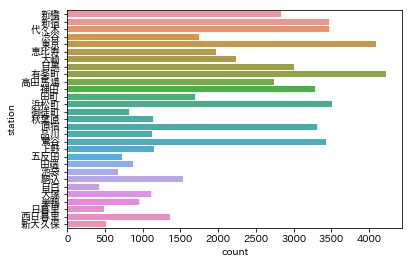

In [110]:
order= ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(len(order)):
    sns.countplot(y="station", data=df_dists[df_dists["Week_num"] == i])

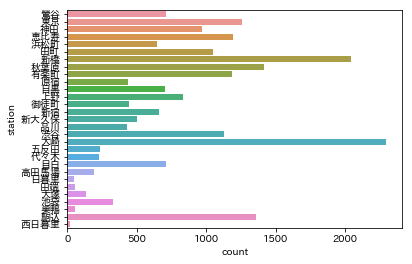

In [115]:
sns.countplot(y="station", data=df_dists[df_dists["Week_num"] == 5])

In [298]:
df_dists[df_dists["min_dis"]>2000]

,dr_num,start_time,finish_time,lat1,lon1,lat2,lon2,dis,date,temperature,rain,min_dis,station,Week_num
89,167007,2016-04-13 08:45:43,2016-04-13 08:57:39,35.584786,139.720018,35.583151,139.728898,2380.455733,2016-04-13,14.4,1.5,2037.801367,池上,2
234,167007,2016-05-13 08:56:06,2016-05-13 09:03:13,35.619846,139.614760,35.627715,139.621150,1938.530068,2016-05-13,21.2,0.0,2590.038269,祖師ヶ谷大蔵,4
260,167007,2016-05-15 09:19:48,2016-05-15 09:56:52,35.545470,139.767640,35.646916,139.826110,21327.968236,2016-05-15,17.6,0.0,10000.000000,NaN,6
437,167007,2016-06-09 04:26:15,2016-06-09 08:58:29,35.712321,139.927120,35.697001,139.799280,25423.570629,2016-06-09,21.2,6.5,10000.000000,NaN,3
454,167007,2016-06-13 17:00:57,2016-06-13 17:04:13,35.667487,139.865550,35.664306,139.860840,704.270688,2016-06-13,19.8,98.5,2533.467509,葛西臨海公園,0
512,167007,2016-06-19 06:55:37,2016-06-19 07:10:51,35.587312,139.726890,35.554217,139.785810,10262.227004,2016-06-19,24.3,5.0,2225.257827,大井町,6
550,167007,2016-06-24 07:50:57,2016-06-24 07:55:18,35.544800,139.768100,35.552607,139.786940,2662.244768,2016-06-24,22.7,1.5,10000.000000,NaN,4
828,167007,2016-08-21 05:32:19,2016-08-21 05:36:12,35.688680,139.904345,35.692650,139.897600,1264.994379,2016-08-21,27.9,0.0,10000.000000,NaN,6
829,167007,2016-08-21 05:37:46,2016-08-21 05:45:44,35.692963,139.897800,35.666740,139.873400,4120.700360,2016-08-21,27.9,0.0,10000.000000,NaN,6
835,167007,2016-08-22 17:37:44,2016-08-22 17:49:24,35.581191,139.782575,35.577502,139.735570,4911.767552,2016-08-22,25.7,106.5,10000.000000,NaN,0


### ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'] が0, 1, 2, ,3, 4, 5, 6

In [299]:
df_dists.to_csv("dr_record_sta.csv")

In [301]:
7129/len(df_dists)*100

3.966703946672898